<a href="https://colab.research.google.com/github/premkumar25/Mutliclass_Image_classification_CNN/blob/main/Multiclass_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import files directly from kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"iampremkumar","key":"5b6d5eb9abe6136b409aedb839224451"}'}

In [4]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d abtabm/multiclassimagedatasetairplanecar

kaggle.json
multiclassimagedatasetairplanecar.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile
zip = zipfile.ZipFile('/content/multiclassimagedatasetairplanecar.zip')
zip.extractall()
zip.close()

## Create Image Data generator

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
image_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_dataset = image_gen.flow_from_directory(directory='/content/Dataset/train',
                                              batch_size=32,
                                              target_size=(64,64),
                                              shuffle=True,
                                              subset='training',
                                              class_mode='categorical')
validation_dataset = image_gen.flow_from_directory(directory='/content/Dataset/train',
                                              batch_size=32,
                                              target_size=(64,64),
                                              shuffle=True,
                                              subset='validation',
                                              class_mode='categorical')

Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


##Creating CNN

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [13]:
cnn_model = tf.keras.Sequential()

cnn_model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))

cnn_model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

cnn_model.add(Conv2D(filters=64,kernel_size=3, padding='same', activation='relu'))

cnn_model.add(Conv2D(filters=128,kernel_size=3, padding='same', activation='relu'))

cnn_model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

cnn_model.add(Conv2D(filters=64,kernel_size=3, padding='same', activation='relu'))

cnn_model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

cnn_model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

cnn_model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

cnn_model.add(Flatten())

cnn_model.add(Dense(units=128, activation='relu'))

cnn_model.add(Dense(units=3, activation='sigmoid'))

In [14]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [6]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0

In [15]:
fit = cnn_model.fit(x=train_dataset, validation_data=validation_dataset, epochs=9)

Epoch 1/9
75/75 [==============================] - 35s 461ms/step - loss: 0.9869 - accuracy: 0.4753 - val_loss: 0.6642 - val_accuracy: 0.6850
Epoch 2/9
75/75 [==============================] - 34s 457ms/step - loss: 0.6259 - accuracy: 0.7418 - val_loss: 0.5638 - val_accuracy: 0.7800
Epoch 3/9
75/75 [==============================] - 34s 457ms/step - loss: 0.5127 - accuracy: 0.8058 - val_loss: 0.5227 - val_accuracy: 0.8050
Epoch 4/9
75/75 [==============================] - 34s 461ms/step - loss: 0.3933 - accuracy: 0.8544 - val_loss: 0.4010 - val_accuracy: 0.8433
Epoch 5/9
75/75 [==============================] - 34s 456ms/step - loss: 0.3736 - accuracy: 0.8601 - val_loss: 0.3504 - val_accuracy: 0.8667
Epoch 6/9
75/75 [==============================] - 34s 455ms/step - loss: 0.3044 - accuracy: 0.8860 - val_loss: 0.3700 - val_accuracy: 0.8533
Epoch 7/9
75/75 [==============================] - 34s 459ms/step - loss: 0.2313 - accuracy: 0.9083 - val_loss: 0.3872 - val_accuracy: 0.8417
Epoch 

## Predict Images

In [9]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os
import numpy as np

[[9.9990785e-01 1.0018946e-03 8.6776138e-04]]


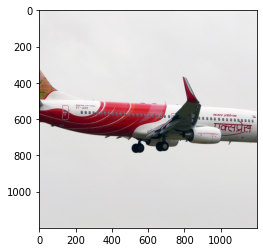

Its an Airplane
[[0.7837756  0.8673333  0.03983695]]


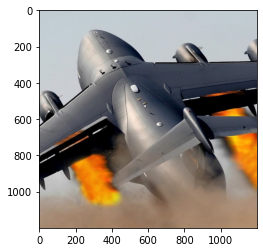

Its a car
[[0.9044378  0.00187877 0.73995084]]


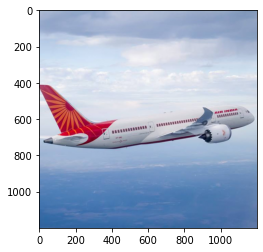

Its an Airplane
[[0.9264019  0.00502957 0.49741384]]


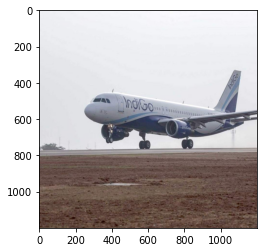

Its an Airplane
[[0.92616785 0.26213017 0.1195956 ]]


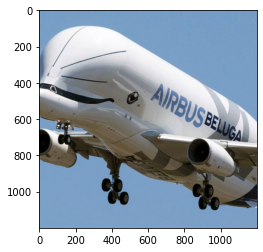

Its an Airplane
[[0.6537353  0.35954046 0.4161054 ]]


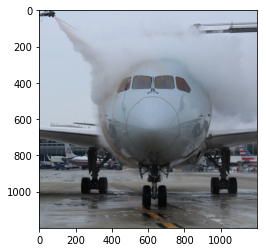

Its an Airplane
[[0.37854472 0.96684563 0.13448665]]


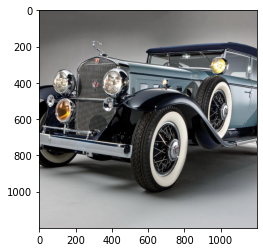

Its a car
[[0.04511661 0.999225   0.01888824]]


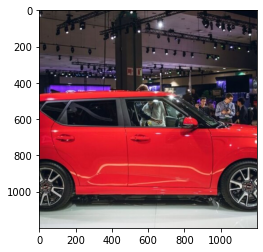

Its a car
[[0.6007616  0.9384827  0.16371514]]


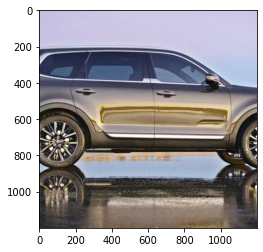

Its a car
[[3.8365355e-01 9.9994302e-01 5.0581736e-04]]


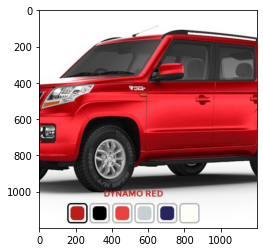

Its a car
[[0.7931484  0.92489845 0.07188176]]


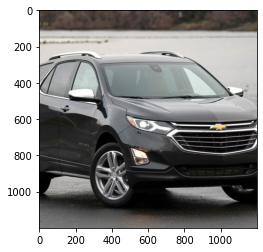

Its a car
[[0.91286016 0.97582245 0.01275252]]


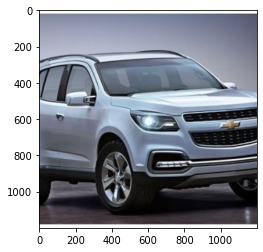

Its a car
[[0.09725801 0.00609096 0.9857714 ]]


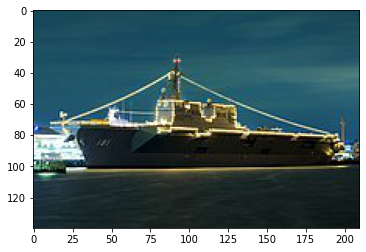

Its a ship
[[0.20232406 0.00495175 0.93729746]]


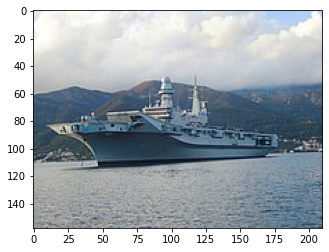

Its a ship
[[0.11634161 0.0599166  0.9501518 ]]


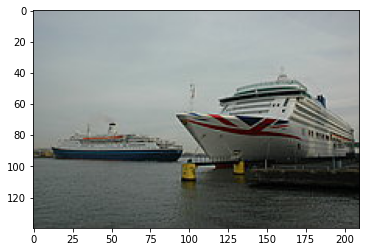

Its a ship
[[0.00284747 0.00599512 0.9988944 ]]


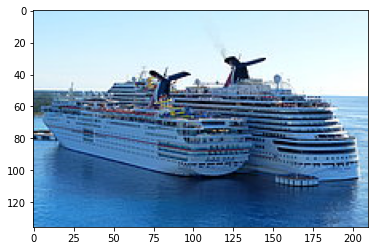

Its a ship
[[0.5509774  0.01120717 0.8970267 ]]


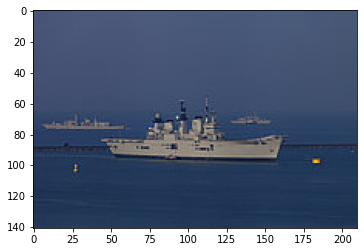

Its a ship
[[1.2831835e-01 3.9120310e-04 9.9688244e-01]]


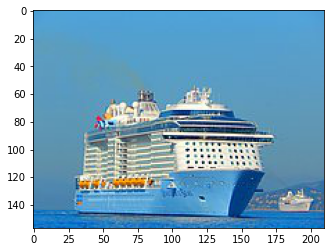

Its a ship


In [51]:
airplane_dir = '/content/Dataset/test/airplanes'
car_dir = '/content/Dataset/test/cars'
ships_dir = '/content/Dataset/test/ships'

ap_batch_Value = 0
car_batch_Value = 0
ship_batch_Value = 0

for i in os.listdir(airplane_dir):
  input_image = image.load_img(airplane_dir+'/'+i, target_size=(64,64,3))
  input_image = image.img_to_array(input_image)
  input_image = input_image/255
  input_image = np.expand_dims(input_image, axis=0)
  prediction = cnn_model.predict(input_image)
  print(prediction)
  plt.imshow(image.load_img(airplane_dir+'/'+i))
  plt.show()
  if np.argmax(prediction)==0: print('Its an Airplane')
  elif np.argmax(prediction)==1: print('Its a car')
  elif np.argmax(prediction)==2: print('Its a ship')
  if ap_batch_Value == 5:  break
  ap_batch_Value += 1

for i in os.listdir(car_dir):
  input_image = image.load_img(car_dir+'/'+i, target_size=(64,64,3))
  input_image = image.img_to_array(input_image)
  input_image = input_image/255
  input_image = np.expand_dims(input_image, axis=0)
  prediction = cnn_model.predict(input_image)
  print(prediction)
  plt.imshow(image.load_img(car_dir+'/'+i))
  plt.show()
  if np.argmax(prediction)==0: print('Its an Airplane')
  elif np.argmax(prediction)==1: print('Its a car')
  elif np.argmax(prediction)==2: print('Its a ship')
  if car_batch_Value == 5:  break
  car_batch_Value += 1

for i in os.listdir(ships_dir):
  input_image = image.load_img(ships_dir+'/'+i, target_size=(64,64,3))
  input_image = image.img_to_array(input_image)
  input_image = input_image/255
  input_image = np.expand_dims(input_image, axis=0)
  prediction = cnn_model.predict(input_image)
  print(prediction)
  plt.imshow(image.load_img(ships_dir+'/'+i))
  plt.show()
  if np.argmax(prediction)==0: print('Its an Airplane')
  elif np.argmax(prediction)==1: print('Its a car')
  elif np.argmax(prediction)==2: print('Its a ship')
  if ship_batch_Value == 5:  break
  ship_batch_Value += 1

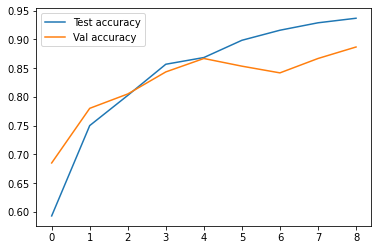

In [16]:
plt.plot(fit.history['accuracy'], label='Test accuracy')
plt.plot(fit.history['val_accuracy'], label='Val accuracy')
plt.legend()
plt.show()

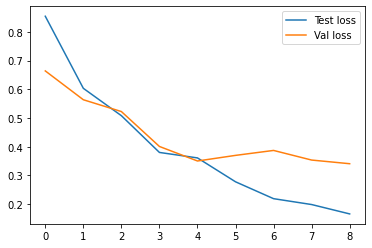

In [17]:
plt.plot(fit.history['loss'], label='Test loss')
plt.plot(fit.history['val_loss'], label='Val loss')
plt.legend()
plt.show()